In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
x_train = pd.read_csv("train.csv").drop("Survived",axis=1)
x_test = pd.read_csv("test.csv")
y_test=pd.read_csv("gender_submission.csv").drop("PassengerId",axis=1)
y_train = pd.read_csv("train.csv")["Survived"]

In [138]:
data_train = pd.concat([x_train,y_train],axis=1)
data_test = pd.concat([x_test,y_test],axis=1)
data_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [139]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Name and PassengerId are just unique identifiers doesn't contribute to determine the survival rate

In [140]:
data_train.drop(["Name","PassengerId"],inplace=True,axis=1)
data_test.drop(["Name","PassengerId"],inplace=True,axis=1)

In [141]:
data_train.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Survived      0
dtype: int64

In [142]:
(data_train.isna().sum()/len(data_train))*100

Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
Survived     0.000000
dtype: float64

In [143]:
data_train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [144]:
data_train[data_train["Ticket"]=="STON/O2. 3101282"]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
2,3,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,1


In [145]:
data_train[data_train["Ticket"]=="347082"]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
13,3,male,39.0,1,5,347082,31.275,NaN,S,0
119,3,female,2.0,4,2,347082,31.275,NaN,S,0
541,3,female,9.0,4,2,347082,31.275,NaN,S,0
542,3,female,11.0,4,2,347082,31.275,NaN,S,0
610,3,female,39.0,1,5,347082,31.275,NaN,S,0
813,3,female,6.0,4,2,347082,31.275,NaN,S,0
850,3,male,4.0,4,2,347082,31.275,NaN,S,0


- Ticket column tells us the ticket number of all passenger(same for whole family) can drop it too.

In [146]:
data_train.drop("Ticket",axis=1,inplace=True)
data_test.drop("Ticket",axis=1,inplace=True)

In [147]:
data_train["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

- Cabin has most null values and just like ticket column it's also represent cabins of an passenger group.

In [148]:
data_train.drop("Cabin",axis=1,inplace=True)
data_test.drop("Cabin",axis=1,inplace=True)

<Axes: ylabel='Frequency'>

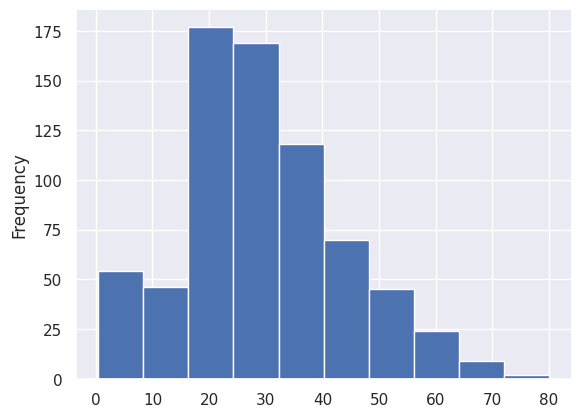

In [149]:
data_train["Age"].plot.hist()

In [150]:
data_train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [151]:
print("The skewness of age is ",data_train["Age"].skew())
print("The mode of age is ",data_train["Age"].mode())
print("The variance of age is ",data_train["Age"].var())

The skewness of age is  0.38910778230082704
The mode of age is  0    24.0
Name: Age, dtype: float64
The variance of age is  211.01912474630802


In [152]:
data_train["Age"].fillna(value=data_train["Age"].median(),inplace=True)
data_test["Age"].fillna(value=data_test["Age"].median(),inplace=True)

data_train["Embarked"].fillna(value=data_test["Embarked"].mode()[0],inplace=True)
data_test["Fare"].fillna(value=data_test["Fare"].median(),inplace=True)

<Axes: ylabel='Frequency'>

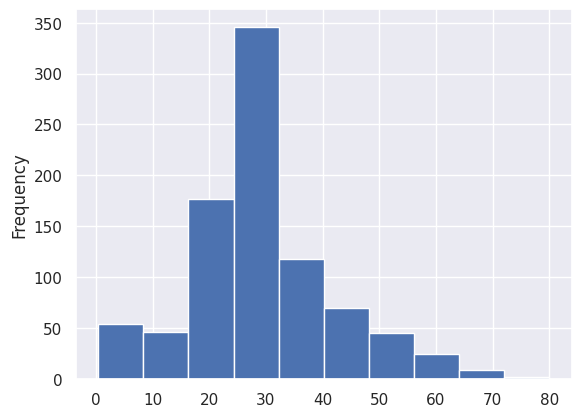

In [153]:
data_train["Age"].plot(kind="hist")

<ipython-input-154-e6dce478138d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_train.corr()


<Axes: >

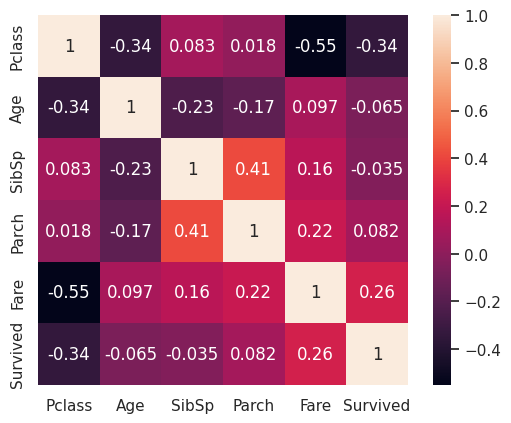

In [154]:
sns.set()
corr = data_train.corr()
sns.heatmap(corr,annot=True,square=True)

In [155]:
cat = data_train.drop("Survived",axis=1).select_dtypes(include="object").columns
num = data_train.drop("Survived",axis=1).select_dtypes(exclude="object").columns

<Axes: >

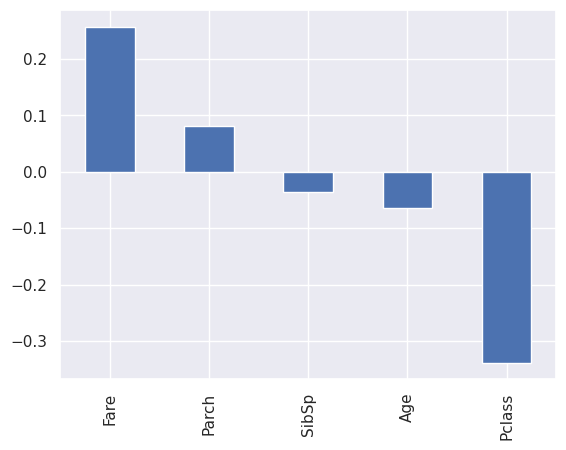

In [156]:
a = pd.Series(corr["Survived"],index = num)
a.sort_values(ascending=False ,inplace=True)
a.plot.bar()

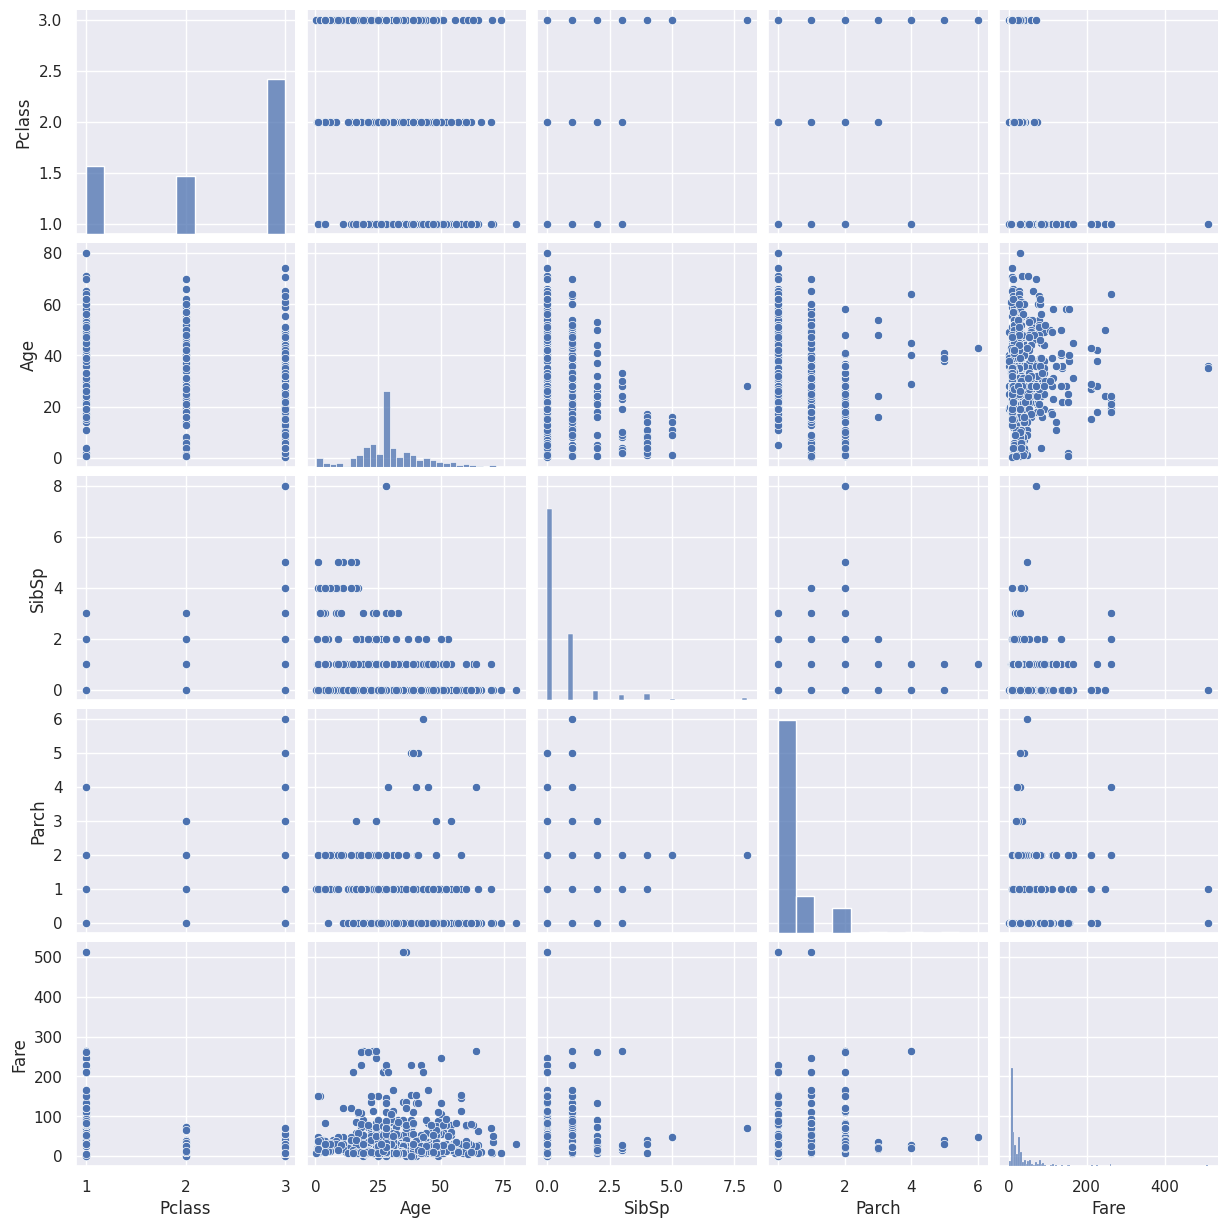

In [157]:
sns.set()
sns.pairplot(data_train[data_train.select_dtypes(exclude="object").drop("Survived",axis=1).columns])
plt.show()

In [158]:
data_train.select_dtypes(include="object")

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


<Axes: >

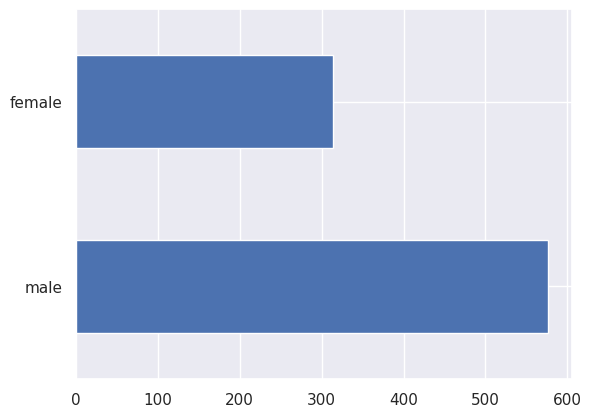

In [159]:
data_train.Sex.value_counts().plot.barh()

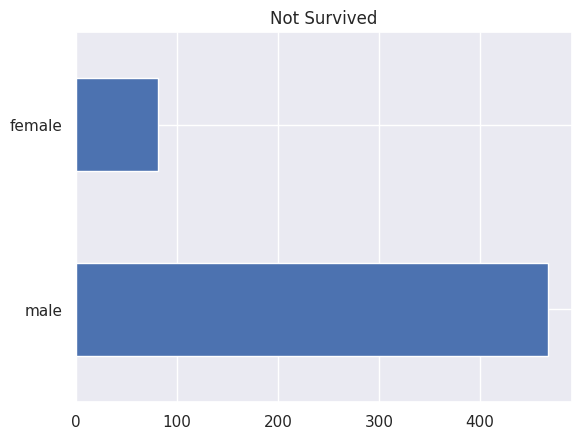

In [160]:
plt.title("Not Survived")
data_train[data_train["Survived"]==0].Sex.value_counts().plot.barh()
plt.show()

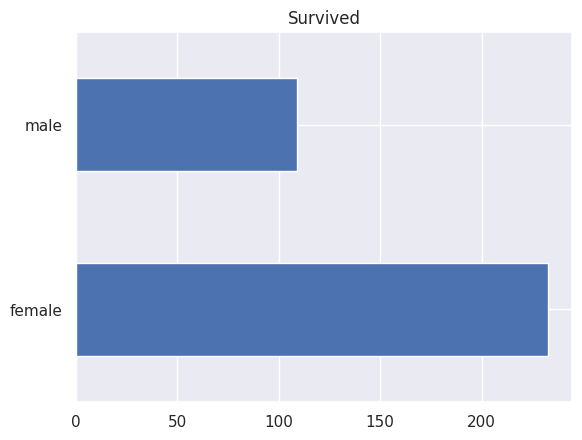

In [161]:
plt.title("Survived")
data_train[data_train["Survived"]==1].Sex.value_counts().plot.barh()
plt.show()

Text(0.5, 1.0, 'Pclass Total')

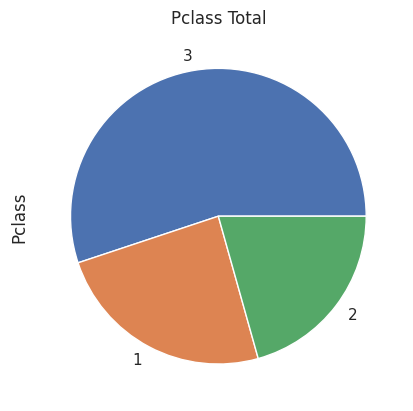

In [162]:
data_train.Pclass.value_counts().plot.pie()
plt.title("Pclass Total")

Text(0.5, 1.0, 'Not Survived')

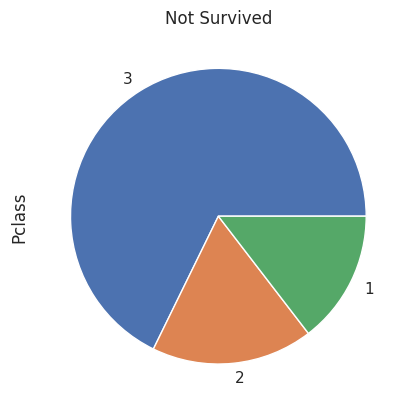

In [163]:
data_train[data_train["Survived"] == 0].Pclass.value_counts().plot.pie()
plt.title("Not Survived")

Text(0.5, 1.0, 'Survived')

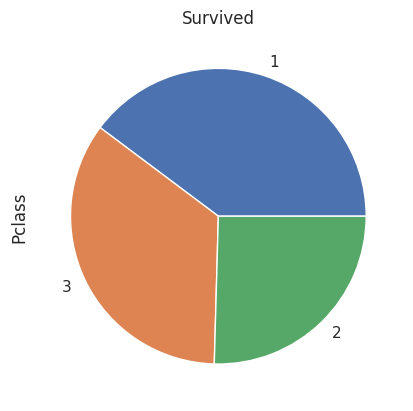

In [164]:
data_train[data_train["Survived"] == 1].Pclass.value_counts().plot.pie()
plt.title("Survived")

In [165]:
x_train = data_train.drop("Survived",axis=1)
x_test = data_test.drop("Survived" , axis=1)

In [166]:
y_train = data_train["Survived"]
y_test = data_test["Survived"]

In [167]:
x_train = x_train.reset_index().drop("index",axis=1)
x_test = x_test.reset_index().drop("index",axis=1)

In [168]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [169]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [170]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
x_train = pd.concat([pd.DataFrame(ohe.fit_transform(x_train["Sex"].to_numpy().reshape(-1,1)) , columns = ["Male","Female"]) , x_train.drop("Sex",axis=1) ] , axis=1)
x_train = pd.concat([pd.DataFrame(ohe.fit_transform(x_train["Embarked"].to_numpy().reshape(-1,1)) , columns = ["S","C","Q"]) , x_train.drop("Embarked",axis=1) ] , axis=1)

x_test = pd.concat([pd.DataFrame(ohe.fit_transform(x_test["Sex"].to_numpy().reshape(-1,1)) , columns = ["Male","Female"]) , x_test.drop("Sex",axis=1) ] , axis=1)
x_test = pd.concat([pd.DataFrame(ohe.fit_transform(x_test["Embarked"].to_numpy().reshape(-1,1)) , columns = ["S","C","Q"]) , x_test.drop("Embarked",axis=1) ] , axis=1)

In [171]:
float_col = x_train.select_dtypes(include = "float").drop("Fare",axis=1).columns
x_train[float_col] = x_train[float_col].astype("int")

float_col = x_test.select_dtypes(include = "float").drop("Fare",axis=1).columns
x_test[float_col] = x_test[float_col].astype("int")

In [172]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 400)
lr.fit(x_train , y_train)

LogisticRegression(max_iter=400)

In [173]:
y_pred = lr.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))
print("Test Score : ",lr.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       266
           1       0.91      0.94      0.92       152

    accuracy                           0.94       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.94      0.94      0.94       418

Test Score :  0.9425837320574163
